# Aircraft Purchase Analysis

## 1.0 Importing relevant Libraries 

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

## 1.1 Reading data set from our CSV & pre-viewing our Data set

In [441]:
#Reading from csv and defining the data frame variable to be used and previewing first 5 rows
#encoding='latin-1' is used to get rid of the error of UTF-8
#Also combining the two data frames given
df = pd.read_csv('AviationData.csv',encoding='latin-1', low_memory=False)
df2 = pd.read_csv('USState_Codes.csv')
df3 = pd.concat([df,df2])
df3.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,US_State,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,NaN,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,NaN,NaN
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,NaN,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,NaN,NaN
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,NaN,NaN


In [442]:
df3 = df3.rename(columns={'Event.Id':'Event Id','Investigation.Type':'Investigation Type', 'Accident.Number':'Accident Number', 'Event.Date':'Event Date', 'Airport.Code':'Airport Code',
       'Airport.Name':'Airport Name', 'Injury.Severity':'Injury Severity', 'Aircraft.damage': 'Aircraft damage',
       'Aircraft.Category':'Aircraft Category', 'Registration.Number':'Registration Number',
       'Amateur.Built':'Amateur Built', 'Number.of.Engines':'Number of Engines', 'Engine.Type':'Engine Type', 'FAR.Description':'FAR Description', 'Purpose.of.flight':'Purpose of flight', 'Air.carrier':'Air carrier', 'Total.Fatal.Injuries':'Total Fatal Injuries',
       'Total.Serious.Injuries':'Total Serious Injuries', 'Total.Minor.Injuries':'Total Minor Injuries', 'Total.Uninjured':'Total Uninjured',
       'Weather.Condition':'Weather Condition', 'Broad.phase.of.flight':'Broad phase of flight', 'Report.Status':'Report Status',
       'Publication.Date':'Publication Date'})

In [443]:
#checking for duplicates
df3.duplicated().value_counts()

False    88951
dtype: int64

In [444]:
df3.shape

(88951, 33)

In [445]:
#checking for null values
df3.isna().sum()

Event Id                     62
Investigation Type           62
Accident Number              62
Event Date                   62
Location                    114
Country                     288
Latitude                  54569
Longitude                 54578
Airport Code              38702
Airport Name              36161
Injury Severity            1062
Aircraft damage            3256
Aircraft Category         56664
Registration Number        1379
Make                        125
Model                       154
Amateur Built               164
Number of Engines          6146
Engine Type                7139
FAR Description           56928
Schedule                  76369
Purpose of flight          6254
Air carrier               72303
Total Fatal Injuries      11463
Total Serious Injuries    12572
Total Minor Injuries      11995
Total Uninjured            5974
Weather Condition          4554
Broad phase of flight     27227
Report Status              6443
Publication Date          13833
US_State

In [446]:
df3.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number of Engines', 'Engine Type', 'FAR Description',
       'Schedule', 'Purpose of flight', 'Air carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad phase of flight', 'Report Status',
       'Publication Date', 'US_State', 'Abbreviation'],
      dtype='object')

In [447]:
#Dropping columns we dont need for analysis
df4 = df3.drop(['US_State', 'Abbreviation','Schedule'], axis=1)

In [448]:
df4.shape

(88951, 30)

In [449]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88951 entries, 0 to 61
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88889 non-null  object 
 1   Investigation Type      88889 non-null  object 
 2   Accident Number         88889 non-null  object 
 3   Event Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport Code            50249 non-null  object 
 9   Airport Name            52790 non-null  object 
 10  Injury Severity         87889 non-null  object 
 11  Aircraft damage         85695 non-null  object 
 12  Aircraft Category       32287 non-null  object 
 13  Registration Number     87572 non-null  object 
 14  Make                    88826 non-null  o

*One of the Objectives is to seek to purchase & operate airplanes only

In [450]:
#Isolating the Airplanes only
df4['Aircraft Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft Category, dtype: int64

In [451]:
#Filtering the data by Airplane category only
df5 = df4[df4['Aircraft Category'] == 'Airplane']
df5.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Purpose of flight,Air carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status,Publication Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [452]:
df5.describe()

,Number of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,24863.000000,24452.000000,24393.000000,24739.000000,26717.000000
mean,1.158589,0.655529,0.297708,0.254093,6.367145
std,0.407658,5.943002,2.097923,2.895328,31.849418
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,295.000000,161.000000,380.000000,588.000000


In [453]:
#Dealing with NaN values by filling with zeros
df5 = df5.fillna(0)
df5.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Purpose of flight,Air carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status,Publication Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,0,0,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,0,Air Canada,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,0,0,0,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,0,0,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,Business,0,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,0,0,0,0,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,0,0,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [454]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27617 entries, 5 to 88886
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                27617 non-null  object 
 1   Investigation Type      27617 non-null  object 
 2   Accident Number         27617 non-null  object 
 3   Event Date              27617 non-null  object 
 4   Location                27617 non-null  object 
 5   Country                 27617 non-null  object 
 6   Latitude                27617 non-null  object 
 7   Longitude               27617 non-null  object 
 8   Airport Code            27617 non-null  object 
 9   Airport Name            27617 non-null  object 
 10  Injury Severity         27617 non-null  object 
 11  Aircraft damage         27617 non-null  object 
 12  Aircraft Category       27617 non-null  object 
 13  Registration Number     27617 non-null  object 
 14  Make                    27617 non-null

In [455]:
df5['Aircraft damage'].value_counts()

Substantial    21719
Destroyed       3552
0               1282
Minor            964
Unknown          100
Name: Aircraft damage, dtype: int64

In [456]:
df5['Make']=df5['Make'].str.lower()


In [457]:
#Extracting year only from date fromat
df5['Year'] = pd.to_datetime(df5['Event Date']).dt.strftime('%Y')
df5.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Purpose of flight,Air carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status,Publication Date,Year
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,0,0,Non-Fatal,Substantial,Airplane,CF-TLU,mcdonnell douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,0,Air Canada,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,0,0,0,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,0,0,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,Business,0,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,0,0,0,0,Non-Fatal,Destroyed,Airplane,N14779,bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,0,0,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982


In [458]:
#Exporting cleaned & organized data back to folder
df5.to_csv('AviationCleanData.csv')

In [459]:
df6 = df5.sort_values('Total Fatal Injuries',ascending=False).head(40)

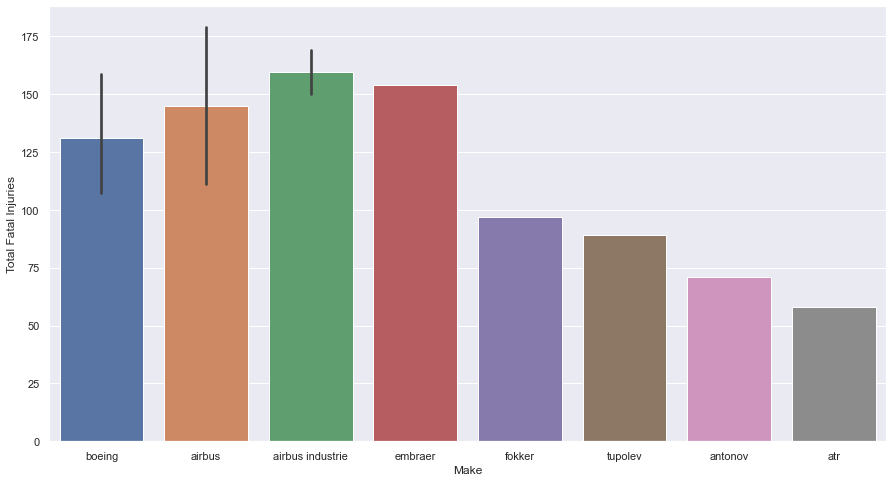

In [460]:
fig = plt.subplots(figsize=(15, 8))
sns.barplot(x='Make',y='Total Fatal Injuries',data=df6);

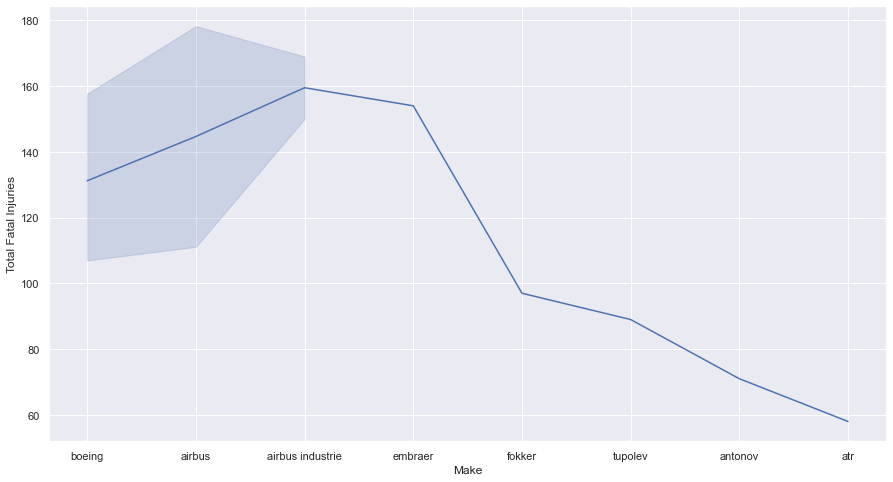

In [461]:
fig = plt.subplots(figsize=(15, 8))
sns.lineplot(x='Make',y='Total Fatal Injuries',data=df6);

In [462]:
df7 = df5.sort_values('Total Uninjured',ascending=False).head(40)

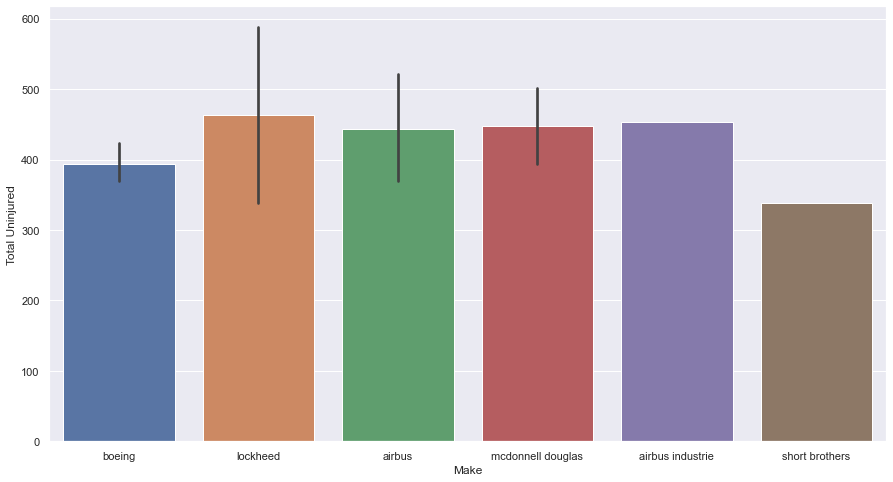

In [463]:
fig = plt.subplots(figsize=(15, 8))
sns.barplot(x='Make',y='Total Uninjured',data=df7);

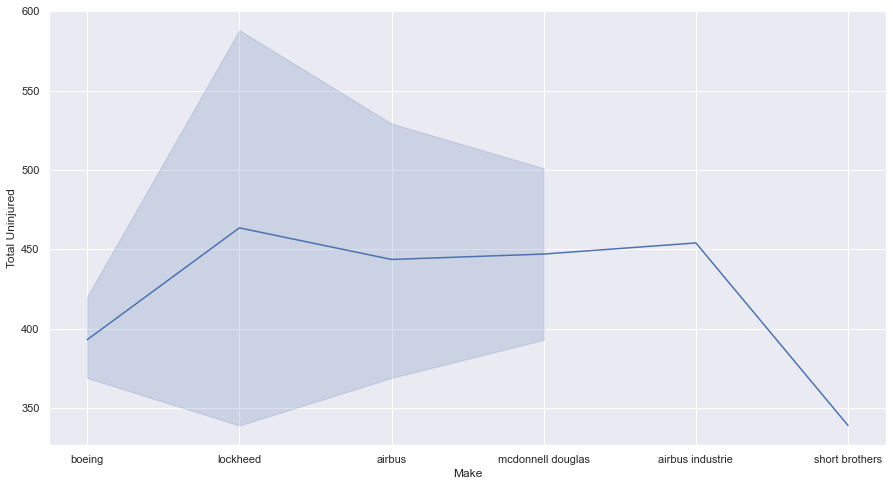

In [464]:
fig = plt.subplots(figsize=(15, 8))
sns.lineplot(x='Make',y='Total Uninjured',data=df7);